In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


## Adding some noise

In [11]:
x_train_noisy = x_train + np.random.normal(loc = 0.0, scale = 0.5, size = x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test + np.random.normal(loc = 0.0, scale = 0.5, size = x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape)
print(x_test_noisy.shape)

(50000, 3072)
(10000, 3072)


In [12]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'sigmoid')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160

In [16]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(x_train_noisy, x_train_noisy, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test_noisy, x_test_noisy])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 22s 444us/step - loss: 0.6807 - accuracy: 0.2291 - val_loss: 0.6714 - val_accuracy: 0.2474
Epoch 2/50
50000/50000 [==============================] - 21s 425us/step - loss: 0.6709 - accuracy: 0.2482 - val_loss: 0.6710 - val_accuracy: 0.2478
Epoch 3/50
50000/50000 [==============================] - 24s 471us/step - loss: 0.6695 - accuracy: 0.2507 - val_loss: 0.6677 - val_accuracy: 0.2541
Epoch 4/50
50000/50000 [==============================] - 26s 519us/step - loss: 0.6671 - accuracy: 0.2549 - val_loss: 0.6671 - val_accuracy: 0.2550
Epoch 5/50
50000/50000 [==============================] - 26s 529us/step - loss: 0.6663 - accuracy: 0.2563 - val_loss: 0.6653 - val_accuracy: 0.2579
Epoch 6/50
50000/50000 [==============================] - 26s 521us/step - loss: 0.6650 - accuracy: 0.2581 - val_loss: 0.6650 - val_accuracy: 0.2580
Epoch 7/50
50000/50000 [==============================] 

In [17]:
encoded_test_data = encoder.predict(x_test_noisy)
predicted_test_data = autoencoder.predict(x_test_noisy)

In [18]:
encoded_test_data.shape

(10000, 32)

In [19]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [20]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [21]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Denoised_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Denoising_Encoders_Test_RSAB.csv', index = False)

In [22]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : dog


In [23]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 8


In [24]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test_noisy)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [25]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [26]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
101,5,dog,0.0,1.211443,0.963854,0.900573,0.0,0.439992,1.558550,0.0,...,0.0,0.784574,0.0,0.0,1.518562,1.163304,1.083788,1.985177,1.000000,5.960464e-08
6312,2,bird,0.0,0.781410,0.689246,0.712552,0.0,0.283074,1.177684,0.0,...,0.0,0.784333,0.0,0.0,1.076713,0.993416,1.001287,1.600485,0.994094,5.906403e-03
2648,4,deer,0.0,0.974345,1.050847,0.781652,0.0,0.315235,1.295580,0.0,...,0.0,0.650488,0.0,0.0,1.306826,1.065481,0.938420,1.635409,0.994046,5.954206e-03
2728,2,bird,0.0,1.047006,0.690937,0.800691,0.0,0.269979,1.529139,0.0,...,0.0,1.047901,0.0,0.0,1.458112,1.237331,1.145297,2.105752,0.993040,6.959677e-03
7717,3,cat,0.0,0.887099,0.946956,0.675694,0.0,0.429206,1.206376,0.0,...,0.0,0.562480,0.0,0.0,1.064439,0.829431,0.936826,1.724109,0.992078,7.921875e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,3,cat,0.0,0.621497,1.211176,0.650638,0.0,0.628665,0.339132,0.0,...,0.0,0.000000,0.0,0.0,0.350462,0.140198,0.291703,0.424411,0.772508,2.274917e-01
925,5,dog,0.0,0.747652,1.343683,0.622792,0.0,0.941458,0.500176,0.0,...,0.0,0.000000,0.0,0.0,0.403022,0.090645,0.379538,0.717500,0.771985,2.280148e-01
1080,6,frog,0.0,0.906398,1.832278,1.056805,0.0,0.784682,0.439406,0.0,...,0.0,0.021079,0.0,0.0,0.463149,0.558216,0.559696,0.312881,0.769846,2.301540e-01
5084,3,cat,0.0,0.668423,1.671689,0.652074,0.0,0.930010,0.481687,0.0,...,0.0,0.000000,0.0,0.0,0.443743,0.067721,0.213706,0.619761,0.749161,2.508385e-01


In [27]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

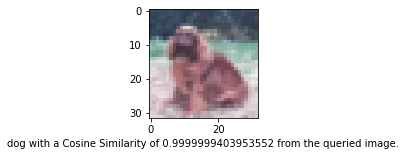

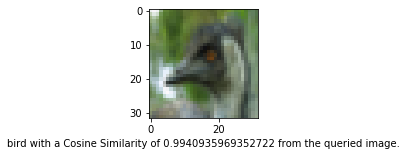

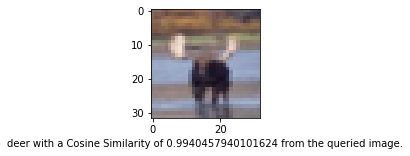

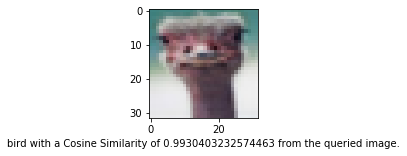

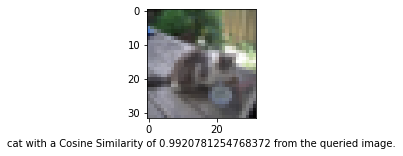

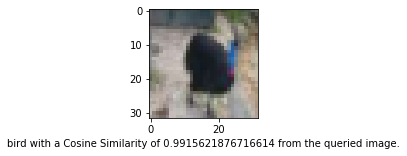

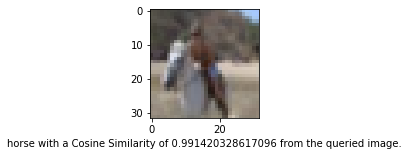

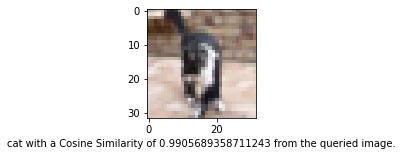

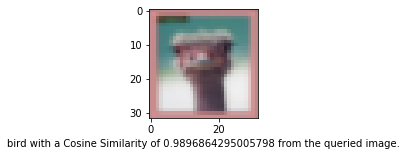

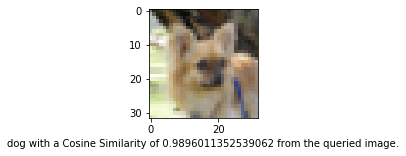

In [28]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [29]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [30]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
101,5,dog,0.0,1.211443,0.963854,0.900573,0.0,0.439992,1.558550,0.0,...,0.784574,0.0,0.0,1.518562,1.163304,1.083788,1.985177,1.000000,5.960464e-08,0.000000
2728,2,bird,0.0,1.047006,0.690937,0.800691,0.0,0.269979,1.529139,0.0,...,1.047901,0.0,0.0,1.458112,1.237331,1.145297,2.105752,0.993040,6.959677e-03,0.597408
9123,2,bird,0.0,0.737880,0.990917,0.837508,0.0,0.292406,1.641099,0.0,...,0.864959,0.0,0.0,1.435200,1.263274,1.087169,1.905458,0.991562,8.437812e-03,0.638295
1163,3,cat,0.0,1.219257,0.853932,0.928831,0.0,0.396374,1.428108,0.0,...,0.873913,0.0,0.0,1.398895,1.131041,1.205431,1.860532,0.990569,9.431064e-03,0.676825
6457,2,bird,0.0,0.872107,1.021206,0.974704,0.0,0.204768,1.443659,0.0,...,0.771480,0.0,0.0,1.392821,1.117487,1.071312,1.722713,0.989686,1.031357e-02,0.693504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8448,4,deer,0.0,0.395132,0.507554,0.352839,0.0,0.316611,0.262607,0.0,...,0.124497,0.0,0.0,0.611826,0.035765,0.181271,0.416875,0.828317,1.716834e-01,3.486519
1240,2,bird,0.0,0.500079,0.641610,0.418355,0.0,0.243143,0.241784,0.0,...,0.000000,0.0,0.0,0.428420,0.121738,0.152888,0.303354,0.831668,1.683323e-01,3.492815
7794,5,dog,0.0,0.376966,0.685771,0.350507,0.0,0.237383,0.337792,0.0,...,0.000000,0.0,0.0,0.375879,0.152797,0.152525,0.291193,0.866216,1.337841e-01,3.524053
3724,6,frog,0.0,0.582904,0.670267,0.578955,0.0,0.226614,0.158237,0.0,...,0.074844,0.0,0.0,0.181589,0.221201,0.332224,0.247226,0.789450,2.105497e-01,3.527798


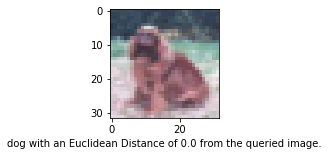

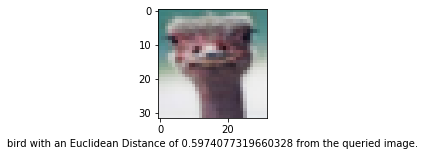

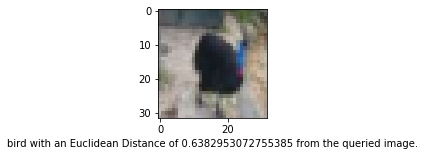

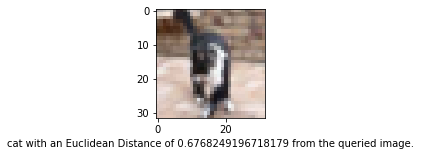

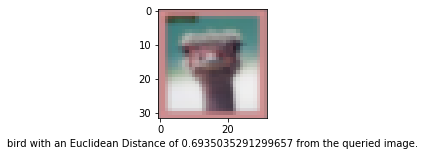

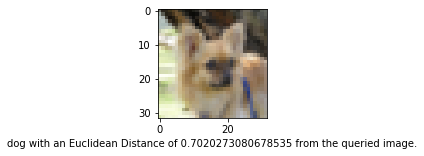

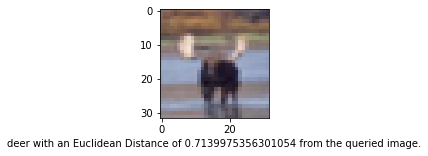

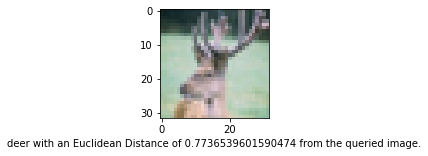

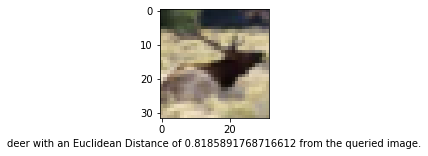

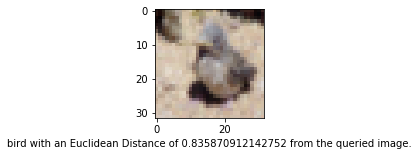

In [31]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()